<a href="https://colab.research.google.com/github/Andru-1987/86400_data_science_i_diplomatura/blob/main/05_visualizaciones_avanzadas/clase_practica/05_clase_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graficas con Seaborn y Matplotlib

In [15]:
import pandas as pd
import numpy as np
# librerias de graficasb
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = sns.load_dataset('flights')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [18]:
df.query("month == 'May'")

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229
64,1954,May,234
76,1955,May,270
88,1956,May,318
100,1957,May,355
112,1958,May,363


### grafico de lineas de un mes: mayo
_Hacer un grafico de lineas con los pasajeros que volvaron en los años para el mes de mayo_

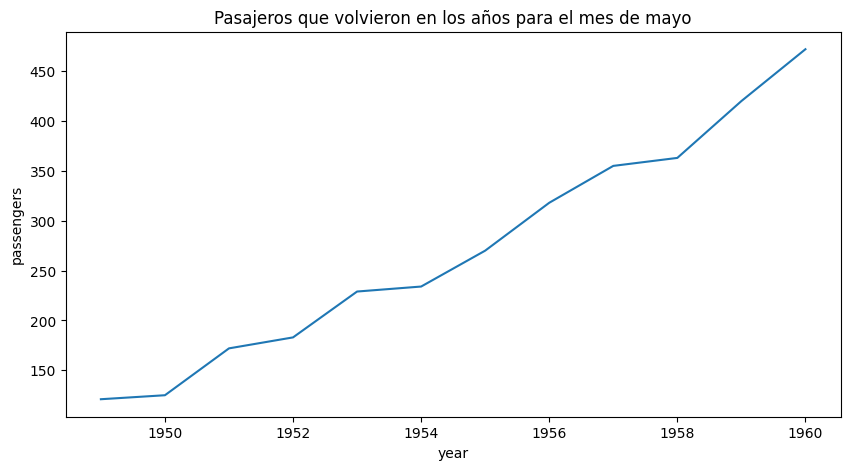

In [19]:
plt.figure(figsize=(10,5))

sns.lineplot(
    data=df.query("month == 'May'"),
    x="year",
    y="passengers"
)

plt.title("Pasajeros que volvieron en los años para el mes de mayo")
plt.show()

#### opcion figure-level

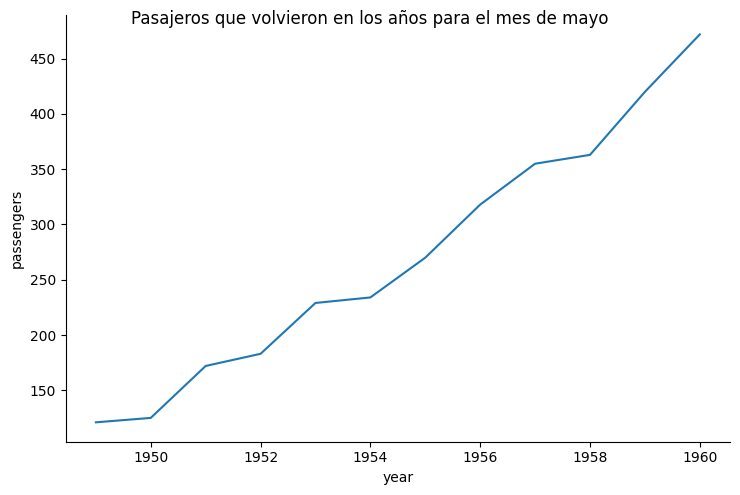

In [20]:
g = sns.relplot(
    data=df.query("month == 'May'"),
    x="year",
    y="passengers",
    height=5,
    aspect=1.5,
    kind="line",
)


g.figure.suptitle("Pasajeros que volvieron en los años para el mes de mayo")
plt.show()

### ScatterPlot

In [21]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
tips.day.describe()

,day
count,244
unique,4
top,Sat
freq,87


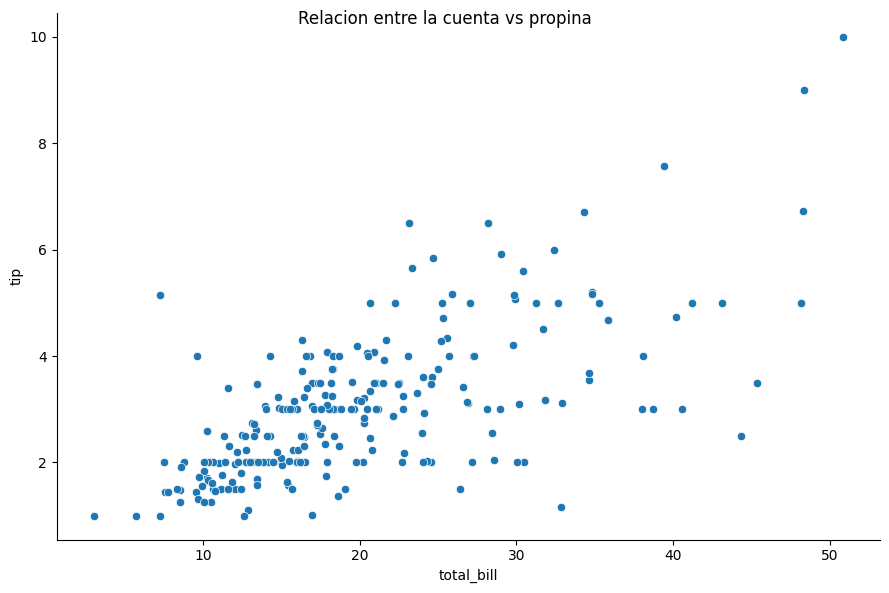

In [23]:
g = sns.relplot(
    data = tips,
    x="total_bill",
    y="tip",
    height=6,
    aspect=1.5,
    kind="scatter"
)

g.figure.suptitle("Relacion entre la cuenta vs propina")
plt.show()


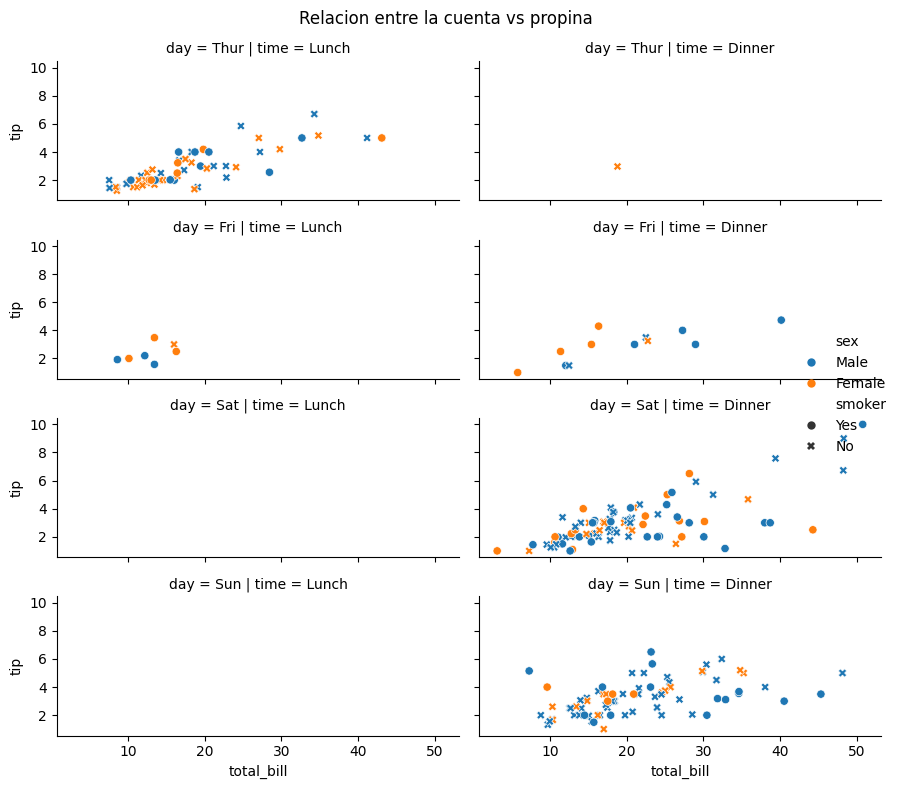

In [24]:
g = sns.relplot(
    data = tips,
    x="total_bill",
    y="tip",
    #me permite separar en dos categorias --> en colores
    hue="sex",
    #me permite diferenciar, el hue -> con otros tipos de puntitos
    style="smoker",
    #me permite separar por graficos
    col="time",
    row="day",
    height=2,
    aspect=2/1,
    kind="scatter"
)

g.figure.suptitle("Relacion entre la cuenta vs propina")
plt.tight_layout()
plt.show()

### Grafico de barras

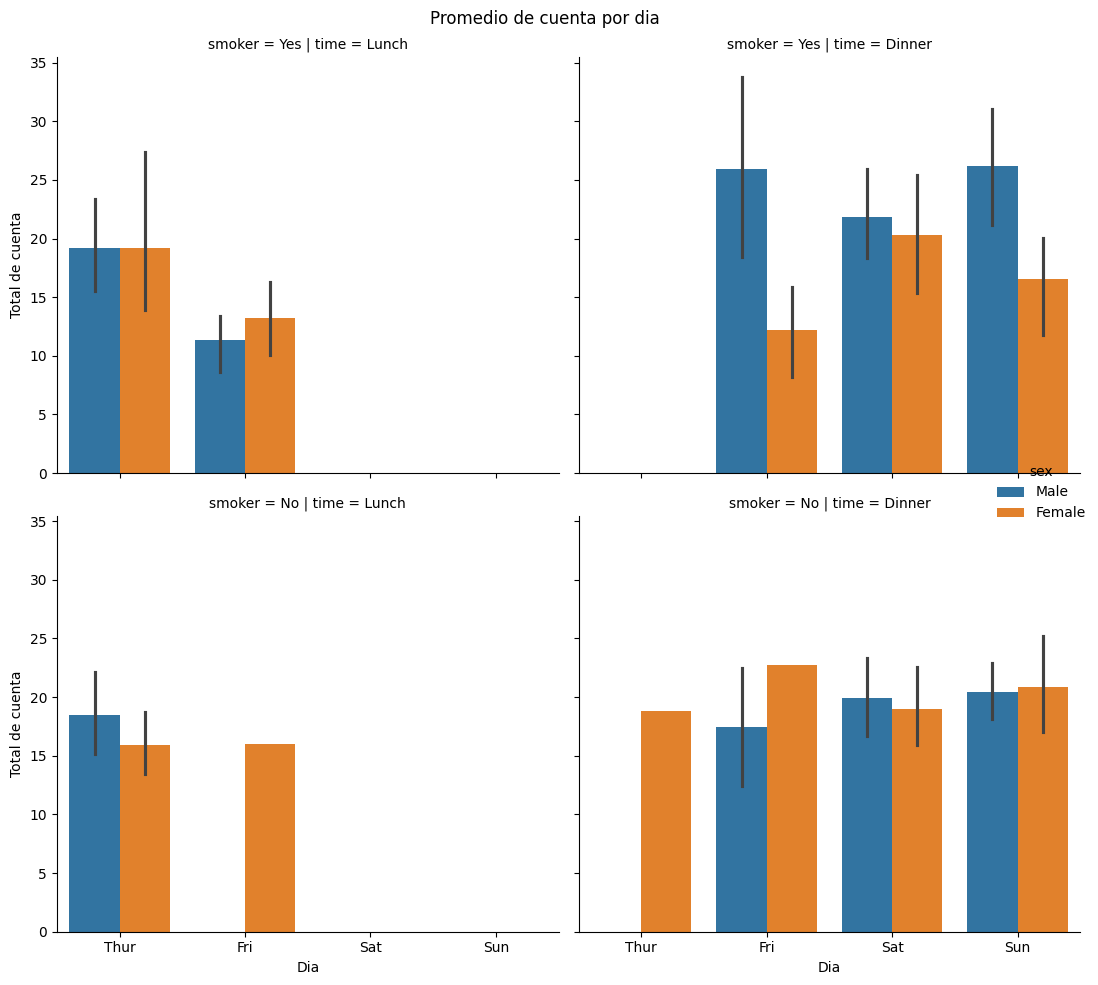

In [25]:
g = sns.catplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex",
    col="time",
    row="smoker",
    kind="bar"
)

g.figure.suptitle("Promedio de cuenta por dia")
g.set_axis_labels("Dia", "Total de cuenta")
plt.tight_layout()
plt.show()


### Histogramas

In [26]:
penguin = sns.load_dataset("penguins")
penguin.dropna(inplace=True)

In [27]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


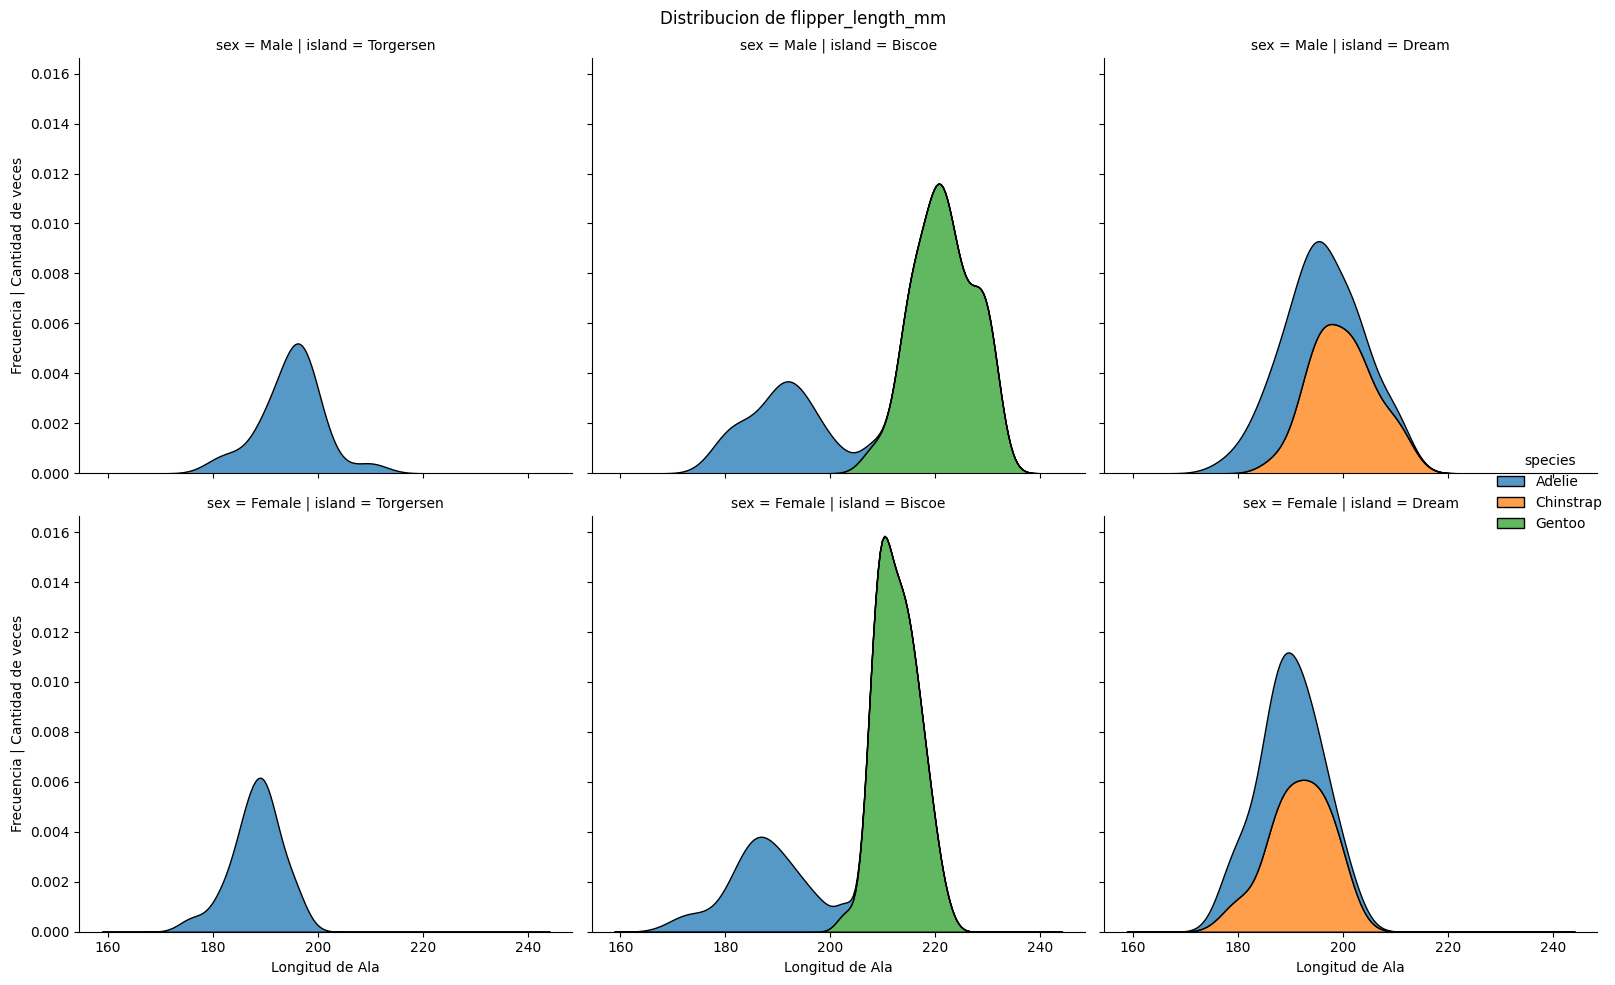

In [28]:
g = sns.displot(
    data=penguin,
    x="flipper_length_mm",
    hue="species",
    col="island",
    row="sex",
    kind="kde",
    multiple="stack"
)

g.figure.suptitle("Distribucion de flipper_length_mm")
g.set_axis_labels("Longitud de Ala", "Frecuencia | Cantidad de veces")
plt.tight_layout()
plt.show()


### Boxplot

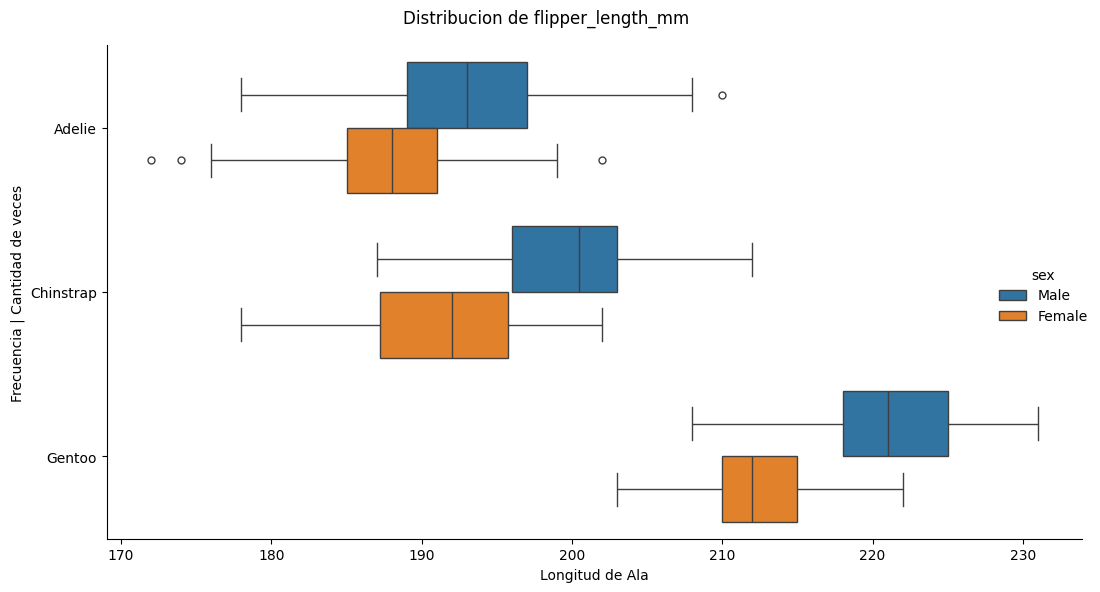

In [29]:
g = sns.catplot(
    data=penguin,
    x="flipper_length_mm",
    y="species",
    hue="sex",
    kind="box",
    # split=True,
    # inner="quartile",
    # scale="count",
    height=6,
    aspect=1.67
)


# sns.swarmplot(
#     data=penguin,
#     x="flipper_length_mm",
#     y="species",
#     hue="sex",
#     color=".2",
#     size=2,
#     ax=g.ax
# )

g.figure.suptitle("Distribucion de flipper_length_mm")
g.set_axis_labels("Longitud de Ala", "Frecuencia | Cantidad de veces")
plt.tight_layout()
plt.show()

In [30]:
penguin.query("sex=='Female' and species=='Adelie'").describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,73.0,37.257534,2.028883,32.1,35.9,37.0,38.8,42.2
bill_depth_mm,73.0,17.621918,0.942993,15.5,17.0,17.6,18.3,20.7
flipper_length_mm,73.0,187.794521,5.595035,172.0,185.0,188.0,191.0,202.0
body_mass_g,73.0,3368.835616,269.380102,2850.0,3175.0,3400.0,3550.0,3900.0


### Heatmap

In [31]:
correlation = tips[["total_bill", "size", "tip"]].corr()

In [32]:
correlation

,total_bill,size,tip
total_bill,1.000000,0.598315,0.675734
size,0.598315,1.000000,0.489299
tip,0.675734,0.489299,1.000000


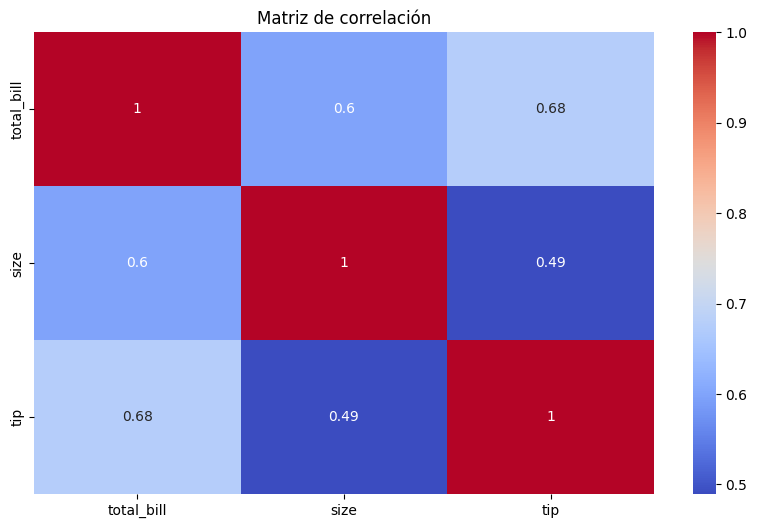

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


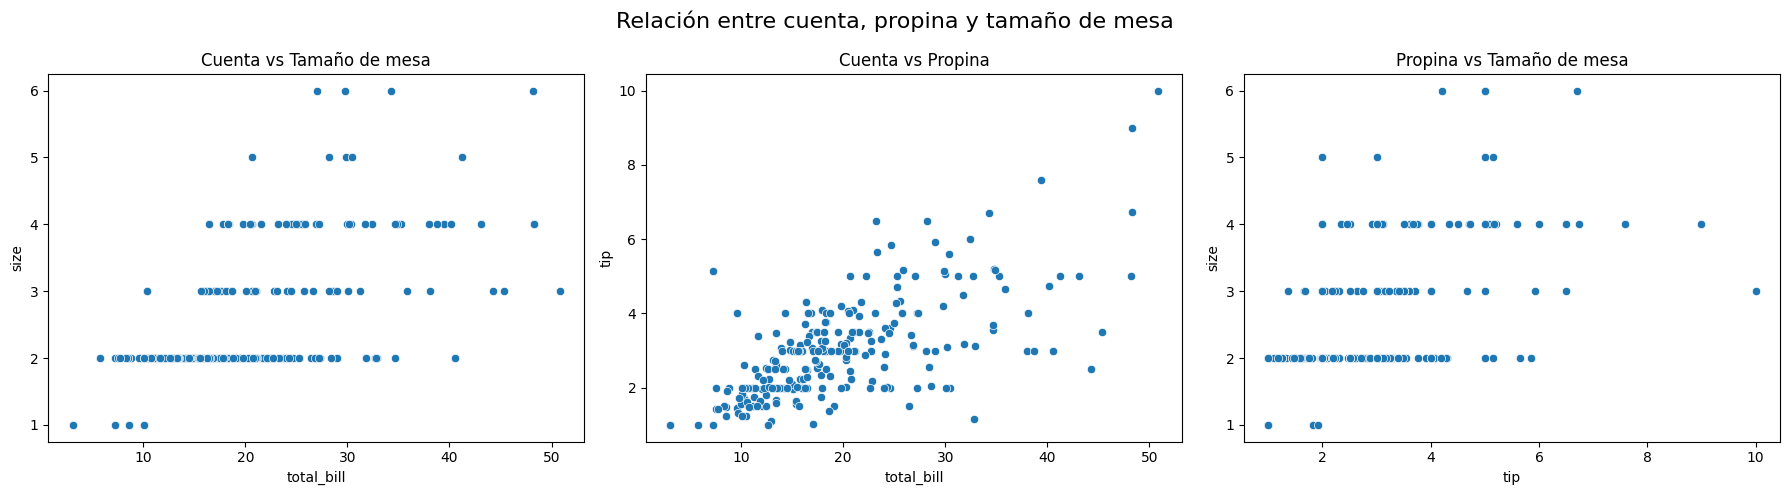

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 fila, 3 columnas

sns.scatterplot(data=tips, x="total_bill", y="size", ax=axes[0])
axes[0].set_title("Cuenta vs Tamaño de mesa")

sns.scatterplot(data=tips, x="total_bill", y="tip", ax=axes[1])
axes[1].set_title("Cuenta vs Propina")

sns.scatterplot(data=tips, x="tip", y="size", ax=axes[2])
axes[2].set_title("Propina vs Tamaño de mesa")

fig.suptitle("Relación entre cuenta, propina y tamaño de mesa", fontsize=16)
plt.tight_layout()
plt.show()

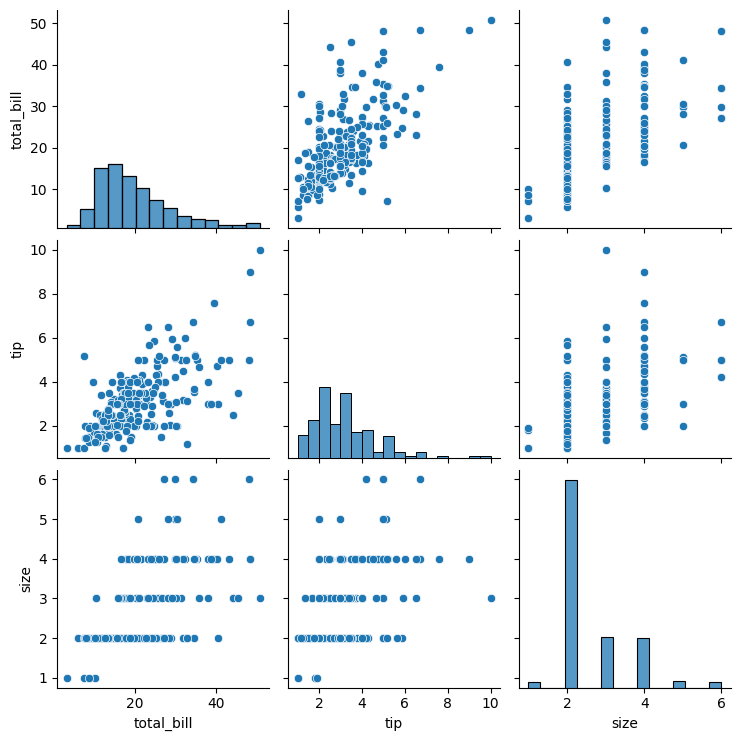

In [35]:
sns.pairplot(tips)

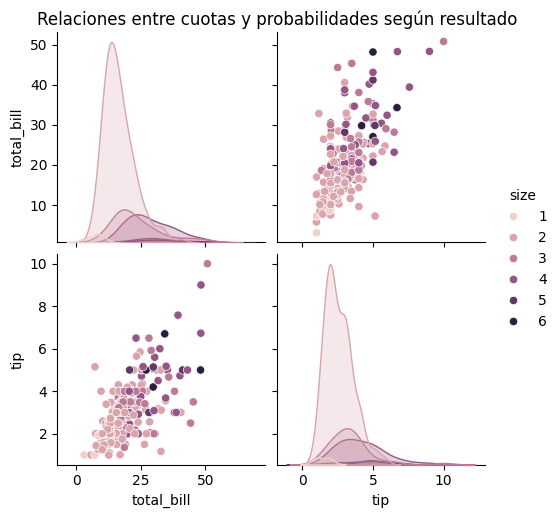

In [36]:
sns.pairplot(
    tips[["total_bill", "size", "tip"]],
    hue="size"
)

# plt.suptitle("Relación entre cuenta, propina y tamaño de mesa", y=1.02)
# plt.show()
#     hue='resultado',
#     palette='Set2',
#     diag_kind='kde',
#     corner=True
# )
plt.suptitle('Relaciones entre cuotas y probabilidades según resultado', y=1.02)
plt.show()

### Graficos de Radar

In [37]:
categorias = ['Calidad', 'Precio', 'Innovación', 'Servicio', 'Satisfacción', 'Sostenibilidad', 'Diseño']

data = pd.DataFrame({
    'nike': [7, 6, 8, 5, 7, 9, 6],
    'puma': [6, 8, 6, 7, 8, 7, 5],
    'flecha': [8, 7, 7, 8, 9, 6, 8]
}, index=categorias)

data

,nike,puma,flecha
Calidad,7,6,8
Precio,6,8,7
Innovación,8,6,7
Servicio,5,7,8
Satisfacción,7,8,9
Sostenibilidad,9,7,6
Diseño,6,5,8


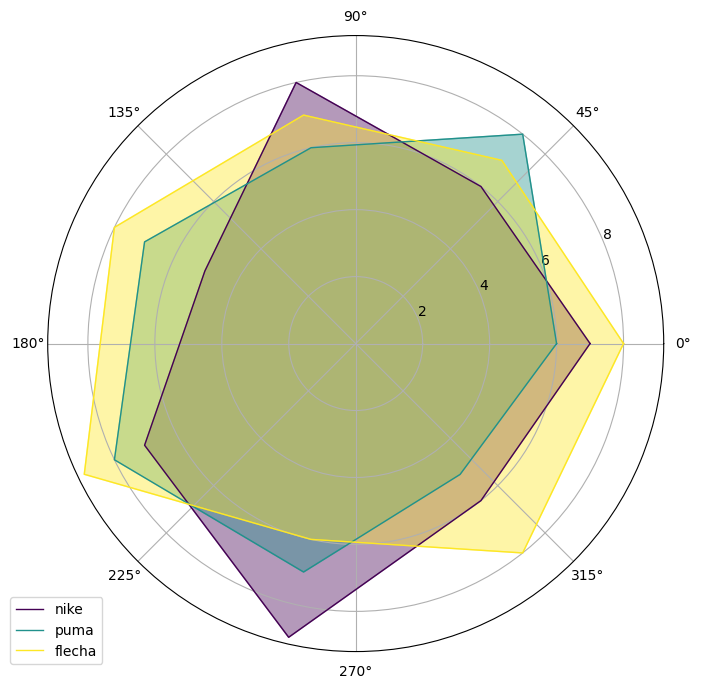

In [38]:
# dame la cantidad de categorias
N = len(categorias)

angles = np.linspace(0, 2*np.pi , N ,endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

## gente con daltonismo -> paleta de colores
paletas_daltonicas = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
colors = plt.get_cmap(paletas_daltonicas[0])(np.linspace(0, 1, len(data.columns)))


# plt.figure(figsize=(8,8))

fig, ax = plt.subplots(
    figsize=(8,8),
    subplot_kw=dict(polar=True)
)


for col, color in zip(data.columns, colors):
    values = data[col].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles,values, linewidth=1, label=col, color=color)
    ax.fill(angles,values, color=color,alpha=0.4)


plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()



In [39]:
url_users:str = r"https://raw.githubusercontent.com/Andru-1987/csv_files_ds/refs/heads/main/Mall_Customers.csv"
df:pd.DataFrame = pd.read_csv(url_users, sep=",", encoding="utf8")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
conteo_genero = df.Gender.value_counts()
conteo_genero

,count
Gender,
Female,112
Male,88


In [41]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [42]:
output_notebook()

In [43]:
conteo_genero = df['Gender'].value_counts()

source = ColumnDataSource(data=dict(
    genero=list(conteo_genero.index),
    conteo=conteo_genero.values,
    porcentaje=(conteo_genero.values / len(df) * 100).round(1),
    color=['pink', 'blue']
))

p = figure(
    width=400,
    height=400,
    title="Clientes por Género",
    x_range=list(conteo_genero.index)
)

p.vbar(
    x='genero',
    top='conteo',
    width=0.5,
    color='color',
    source=source
)

hover = HoverTool()
hover.tooltips = [
    ("Género", "@genero"),
    ("Clientes", "@conteo"),
    ("Porcentaje", "@porcentaje%")
]

p.add_tools(hover)

show(p)